# Proyecto

In [318]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [319]:
data = np.load('proyecto_training_data.npy')
training_data_percent = 80
test_data_percent = 100-training_data_percent
training_data_samples = int(data.shape[0] * (training_data_percent*0.01))
random_indexes = np.random.choice(data.shape[0], size=training_data_samples, replace=False)
training_data = data[random_indexes,:]
test_data = np.delete(data,random_indexes,axis=0)

In [320]:
df = pd.DataFrame(training_data, columns = ['SalePrice','OverallQuality','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [321]:
df.describe()

,SalePrice,OverallQuality,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,951.000000
mean,180880.148116,6.093322,1162.591610,6.515411,1971.199486,70.009464
std,78167.512447,1.372027,392.400182,1.634494,30.231505,24.854628
min,34900.000000,1.000000,372.000000,3.000000,1872.000000,21.000000
25%,129800.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163250.000000,6.000000,1086.000000,6.000000,1972.500000,69.000000
75%,215000.000000,7.000000,1391.000000,7.000000,2000.000000,80.000000
max,625000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [322]:
sale_price = df['SalePrice']
overall_qlt = df['OverallQuality']
fl_sqft = df['1stFlrSF']
rooms_above_grade = df['TotRmsAbvGrd']
year_built = df['YearBuilt']
linear_ftstreet = df['LotFrontage']
#sale_price_sorted = sale_price.sort_values(ascending=True)
#sale_price_sorted

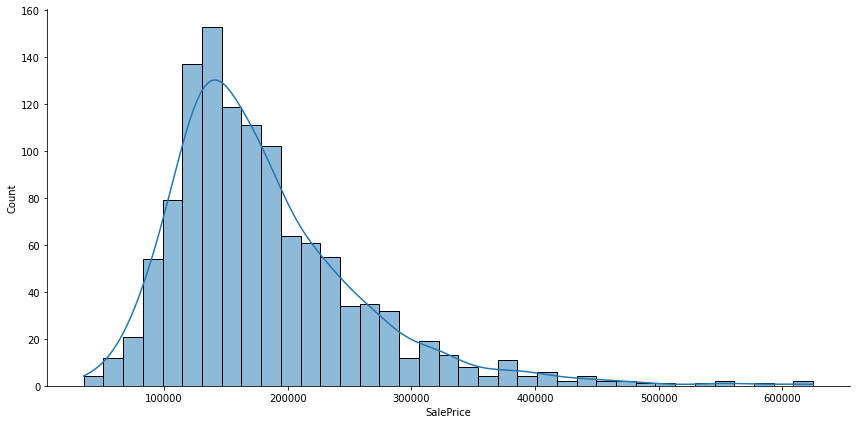

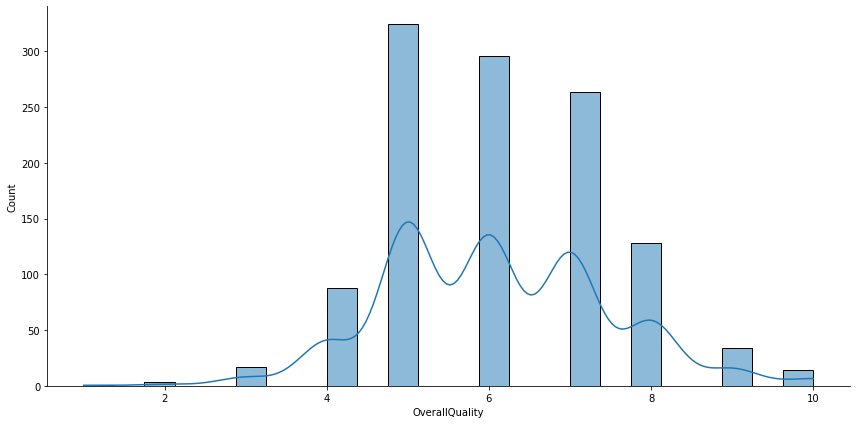

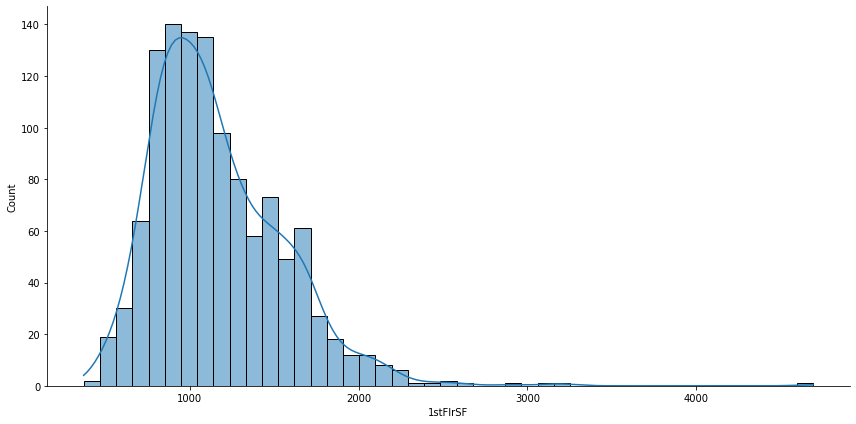

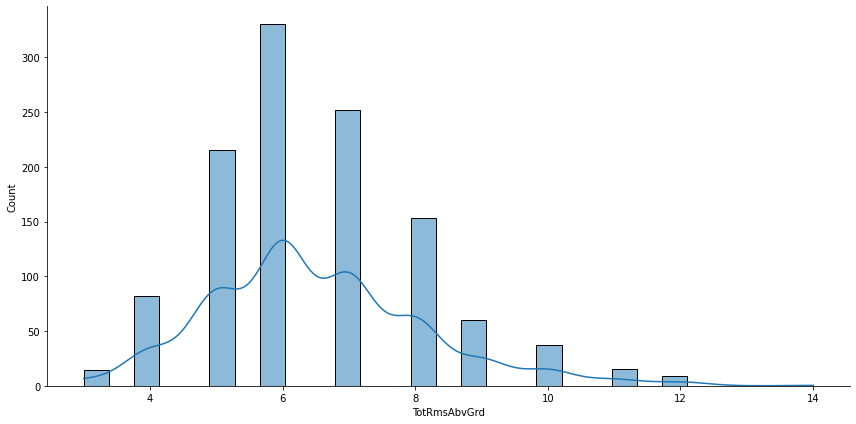

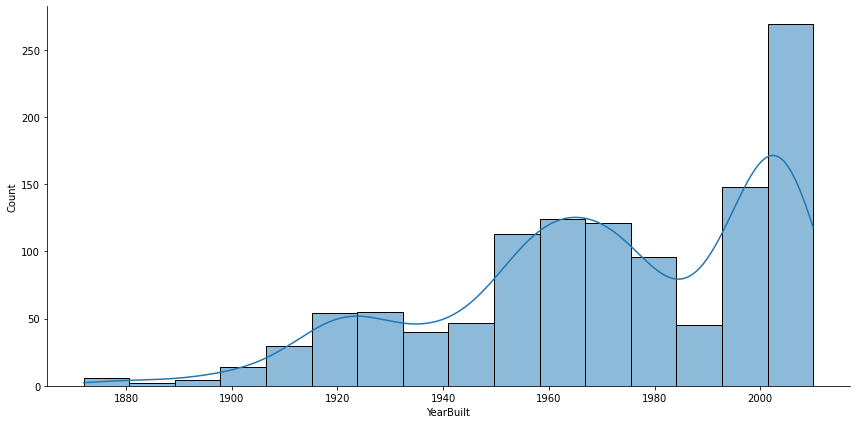

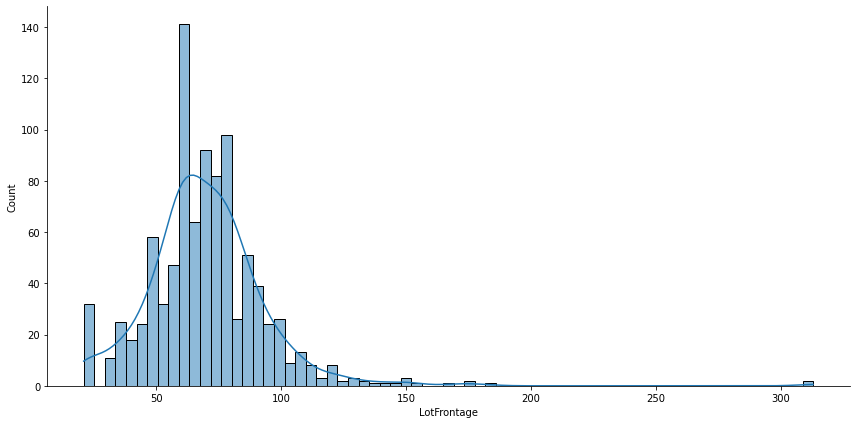

In [323]:
sns.displot(df['SalePrice'], kde=True,height=6, aspect=2,)
sns.displot(df['OverallQuality'], kde=True,height=6, aspect=2,)
sns.displot(df['1stFlrSF'], kde=True,height=6, aspect=2,)
sns.displot(df['TotRmsAbvGrd'], kde=True,height=6, aspect=2,)
sns.displot(df['YearBuilt'], kde=True,height=6, aspect=2,)
sns.displot(df['LotFrontage'], kde=True,height=6, aspect=2,)

In [324]:
corr_p_oq = df['SalePrice'].corr(df['OverallQuality'])
corr_p_oq

0.791752212781831

In [325]:
corr_p_sf = df['SalePrice'].corr(df['1stFlrSF'])
corr_p_sf

0.6033118697278638

In [326]:
corr_p_rooms = df['SalePrice'].corr(df['TotRmsAbvGrd'])
corr_p_rooms

0.5515577759619331

In [327]:
corr_p_yearb = df['SalePrice'].corr(df['YearBuilt'])
corr_p_yearb

0.5179011228664864

In [328]:
corr_p_lfst = df['SalePrice'].corr(df['LotFrontage'])
corr_p_lfst

0.3479208371745037

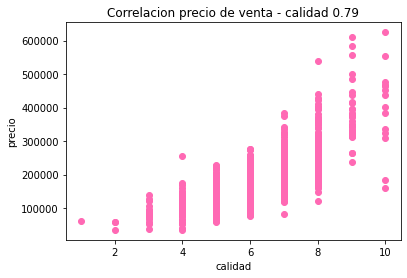

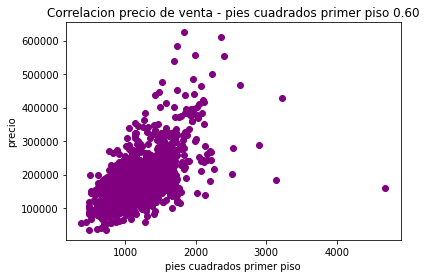

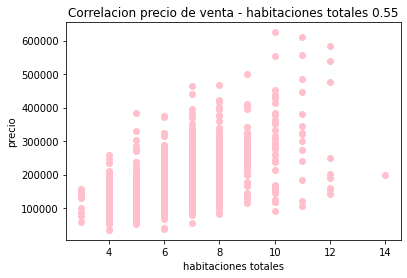

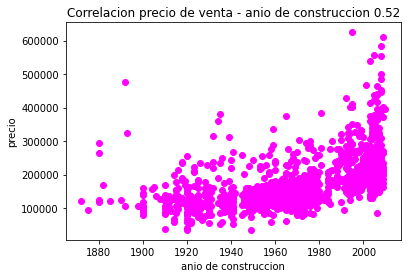

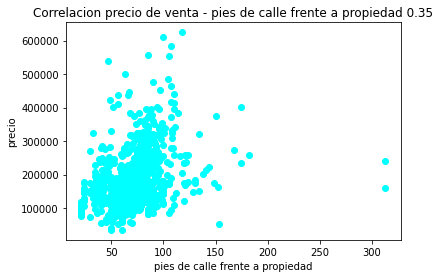

In [329]:
plt.scatter(df['OverallQuality'], df['SalePrice'], color = 'hotpink')
plt.title("Correlacion precio de venta - calidad " + str("%.2f" % corr_p_oq))
plt.xlabel("calidad")
plt.ylabel("precio")
plt.show()
plt.scatter(df['1stFlrSF'], df['SalePrice'], color = 'purple')
plt.title("Correlacion precio de venta - pies cuadrados primer piso " + str("%.2f" % corr_p_sf))
plt.xlabel("pies cuadrados primer piso")
plt.ylabel("precio")
plt.show()
plt.scatter(df['TotRmsAbvGrd'], df['SalePrice'], color = 'pink')
plt.title("Correlacion precio de venta - habitaciones totales " + str("%.2f" % corr_p_rooms))
plt.xlabel("habitaciones totales")
plt.ylabel("precio")
plt.show()
plt.scatter(df['YearBuilt'], df['SalePrice'], color = 'magenta')
plt.title("Correlacion precio de venta - anio de construccion " + str("%.2f" % corr_p_yearb))
plt.xlabel("anio de construccion")
plt.ylabel("precio")
plt.show()
plt.scatter(df['LotFrontage'], df['SalePrice'], color = 'cyan')
plt.title("Correlacion precio de venta - pies de calle frente a propiedad " + str("%.2f" % corr_p_lfst))
plt.xlabel("pies de calle frente a propiedad")
plt.ylabel("precio")
plt.show()

In [430]:
def model_training(vector_x,vector_y, epochs, learning_rate):
    n = len(vector_x)
    zx = np.ones(n)
    mat = np.array([vector_x.astype(object),zx.astype(object)]).transpose()
    betas = np.array([1000,1000])
    betas_gradient = np.array([1,1])
    epoch_counter = 0
    error_vector = np.array([])
    while epoch_counter < epochs:
        y_hat = np.dot(mat,betas)
        t1 = [(a-b)**2 for a,b in zip(vector_y,y_hat)]
        error = (1/(2*n))*(sum(t1))
        error_vector = np.append(error_vector,error)
        yh_minus_y = y_hat - vector_y
        yh_minus_y_mat = np.array([yh_minus_y,yh_minus_y])
        res = np.multiply(mat.transpose(),yh_minus_y_mat).transpose()
        betas_gradient = np.sum((res/n),axis=0)
        betas[0] = betas[0] - (learning_rate * betas_gradient[1])
        betas[1] = betas[1] - (learning_rate * betas_gradient[0])
        epoch_counter += 1
    return mat,error_vector

In [431]:
matrix,errors = model_training(df['1stFlrSF'].to_numpy(),df['SalePrice'].to_numpy(),50,0.0001)

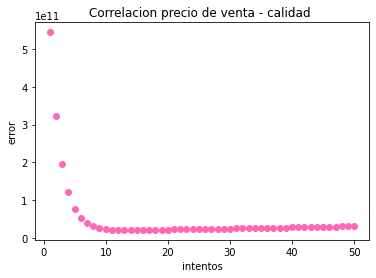

In [432]:
plt.scatter(np.arange(1, len(errors)+1, 1), errors, color = 'hotpink')
plt.title("Correlacion precio de venta - calidad ")
plt.xlabel("intentos")
plt.ylabel("error")
plt.show()

In [433]:
errors

array([5.44346900e+11, 3.22514489e+11, 1.94814524e+11, 1.20711299e+11,
       7.79078879e+10, 5.33544129e+10, 3.92075668e+10, 3.10807900e+10,
       2.65315610e+10, 2.39178306e+10, 2.25362478e+10, 2.18293537e+10,
       2.15529080e+10, 2.14811567e+10, 2.15445458e+10, 2.16993636e+10,
       2.18676746e+10, 2.20915834e+10, 2.23159672e+10, 2.25395225e+10,
       2.27613779e+10, 2.30217948e+10, 2.32829161e+10, 2.35448080e+10,
       2.38075154e+10, 2.40711282e+10, 2.43357120e+10, 2.46013038e+10,
       2.48679466e+10, 2.51357255e+10, 2.54046569e+10, 2.56747598e+10,
       2.59460941e+10, 2.62186850e+10, 2.64925596e+10, 2.67677469e+10,
       2.70842995e+10, 2.73681465e+10, 2.76528327e+10, 2.79793338e+10,
       2.82718080e+10, 2.86065830e+10, 2.89488836e+10, 2.92542158e+10,
       2.96027259e+10, 2.99578506e+10, 3.03190783e+10, 3.06401974e+10,
       3.10055500e+10, 3.13766013e+10])